In [3]:
from notebook_utils import *
import seaborn as sns

In [2]:
experiments_ids = [BitflipExperimentID.IPMA, BitflipExperimentID.CXH, BitflipExperimentID.IPMA2, PhaseflipExperimentID.IPMA, GHZExperimentID.EMBED, ResetExperimentID.main]

# POMDPs Sizes

In [3]:
df = get_all_experiments_attr(experiments_ids, EXPAttr.POMDP_SIZE)

df

NameError: name 'get_all_experiments_attr' is not defined

In [ ]:
# Count entries with the same experiment
# experiment_counts = df['experiment'].value_counts()
# experiment_counts

experiment
ghz-embed         1275
bitflip-ipma       225
bitflip-cxh        225
bitflip-ipma2       83
phaseflip-ipma      83
reset-main          83
Name: count, dtype: int64

In [ ]:
# num_states_counts = df.groupby('experiment')["num_states"].unique()
# num_states_counts

experiment
bitflip-cxh              [353]
bitflip-ipma              [33]
bitflip-ipma2             [17]
ghz-embed         [57, 51, 38]
phaseflip-ipma            [17]
reset-main                 [4]
Name: num_states, dtype: object

# POMDPs Times

In [3]:
df = get_all_experiments_attr(experiments_ids, EXPAttr.POMDP_TIME)

df

,experiment,pomdp_time
0,bitflip-ipma,0.266238
1,bitflip-ipma,0.276269
2,bitflip-ipma,0.259435
3,bitflip-ipma,0.265611
4,bitflip-ipma,0.271420
...,...,...
1969,reset-main,0.000826
1970,reset-main,0.000873
1971,reset-main,0.001114
1972,reset-main,0.000744


In [5]:
df.groupby("experiment")["pomdp_time"].agg(["mean", "min", "max"]).reset_index()

,experiment,mean,min,max
0,bitflip-cxh,12.206964,9.583621,27.608212
1,bitflip-ipma,0.340987,0.255240,1.179058
2,bitflip-ipma2,0.425825,0.329371,1.025690
3,ghz-embed,0.924752,0.384006,2.300086
4,phaseflip-ipma,11.571594,0.812483,32.698146
5,reset-main,0.000788,0.000645,0.001593


# Bellman Times

In [2]:
df = get_all_experiments_attr([BitflipExperimentID.IPMA, BitflipExperimentID.IPMA2, PhaseflipExperimentID.IPMA, GHZExperimentID.EMBED, ResetExperimentID.main], EXPAttr.BELLMAN_TIME)
df

,experiment,horizon,bellman_time
0,bitflip-ipma,4,15.0
1,bitflip-ipma,5,69.0
2,bitflip-ipma,6,305.0
3,bitflip-ipma,7,1328.0
4,bitflip-ipma,4,15.0
...,...,...,...
3802,reset-main,3,0.0
3803,reset-main,4,1.0
3804,reset-main,5,2.0
3805,reset-main,6,5.0


,experiment,horizon,bellman_time
0,bitflip-ipma,4,15.0
1,bitflip-ipma,5,69.0
2,bitflip-ipma,6,305.0
3,bitflip-ipma,7,1328.0
4,bitflip-ipma,4,15.0
...,...,...,...
2029,phaseflip-ipma,3,3.0
2030,phaseflip-ipma,4,11.0
2031,phaseflip-ipma,5,49.0
2032,phaseflip-ipma,6,205.0


<Axes: xlabel='horizon', ylabel='bellman_time'>

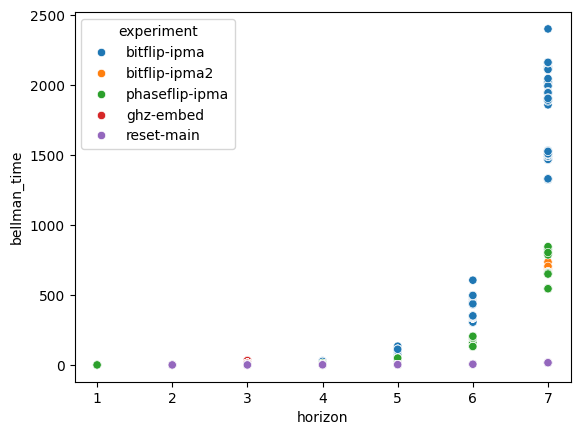

In [7]:
sns.scatterplot(df, x="horizon", y="bellman_time", hue="experiment")